<a href="https://colab.research.google.com/github/dtabuena/Patch_Ephys/blob/main/abf_batching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# !pip install nbimporter
# !pip install pyabf
from IPython.display import clear_output

In [22]:
import pyabf
import os
import pandas as pd
import urllib
import sys
from matplotlib import pyplot as plt
import numpy as np

In [16]:
'''Get Repositories'''
"run dtabuena's ephys notebooks"

parent_folder = r'D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project'
os.chdir(parent_folder)
code_dir = 'git_code'
os.makedirs(code_dir,exist_ok=True)
os.chdir(code_dir)
to_import = [
            'latencey_analyzer.ipynb',
            'membrane_analyzer.ipynb',
            'rmp_analyzer.ipynb',
            'gain_analyzer.ipynb',
            'input_resistance_analyzer.ipynb',
            'rheobase_analyzer.ipynb',
            'IV_analyzer.ipynb',
            'misc_utils.ipynb',
            ]
for f in to_import:
    git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/'+f
    print(git_link)
    urllib.request.urlretrieve(git_link,f)
    %run $f

response = urllib.request.urlretrieve('https://raw.githubusercontent.com/dtabuena/Resources/main/Matplotlib_Config/Load_FS6.py','Load_FS6.py')
%run Load_FS6.py

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/latencey_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/membrane_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rmp_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/gain_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/input_resistance_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rheobase_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/IV_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/misc_utils.ipynb


In [17]:
git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb'
urllib.request.urlretrieve(git_link,'misc_utils.ipynb')
print(git_link)
%run misc_utils.ipynb

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb


In [18]:
def cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv'):
    import pandas as pd
    import os

    rows = []
    for protocol, df in protocol_groups.items():
        df = df.copy()
        df.reset_index(inplace=True)  # to keep filename as column
        df['protocol'] = protocol
        df['file_name'] = df['file_name'].apply(os.path.basename)
        rows.append(df)

    lut_df = pd.concat(rows, ignore_index=True)
    cols = ['file_name', 'cell_id', 'protocol'] + [col for col in lut_df.columns if col not in ['file_name', 'cell_id', 'protocol']]
    lut_df = lut_df[cols].sort_values(by=['cell_id', 'protocol'])

    lut_df.to_csv(csv_name, index=False)

    return lut_df



In [19]:
def catalogue_recs(file_loc, file_naming_scheme):
    file_list = [
        os.path.join(root, f)
        for root, _, files in os.walk(file_loc)
        for f in files if f.endswith('.abf')
    ]

    abf_recordings_df = pd.DataFrame(file_list, columns=['file_name']).set_index('file_name')
    for col in file_naming_scheme + ['cell_id', 'protocol', 'abf_timestamp', 'channelList','sweeps']:
        abf_recordings_df[col] = None

    for filename in abf_recordings_df.index:
        if filename.endswith('.sta'):
            continue

        try:
            abf = pyabf.ABF(filename)
        except (pyabf.ABFException, FileNotFoundError) as e:
            print(f'ABF import error ({filename}): {e}')
            continue

        try:
            base_name = os.path.basename(filename)
            split_words = base_name.split('_')

            cell_id = '_'.join(split_words[:len(file_naming_scheme)])
            abf_recordings_df.at[filename, 'cell_id'] = cell_id

            for idx, field in enumerate(file_naming_scheme):
                abf_recordings_df.at[filename, field] = split_words[idx]

            abf_recordings_df.at[filename, 'protocol'] = abf.protocol
            abf_recordings_df.at[filename, 'abf_timestamp'] = abf.abfDateTime
            abf_recordings_df.at[filename, 'channelList'] = abf.channelList
            abf_recordings_df.at[filename, 'sweeps'] = len(abf.sweepList)
        except (IndexError, AttributeError, ValueError) as e:
            print(f'Data handling error ({filename}): {e}')
            continue

    abf_recordings_df.sort_index(inplace=True)
    protocol_groups = {protocol: df for protocol, df in abf_recordings_df.groupby('protocol')}

    return protocol_groups



os.chdir(parent_folder)
os.makedirs('analysis',exist_ok=True)
os.chdir('analysis')
dataset = {'data_name': 'data',
           'data_source': r"D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs",
           'file_naming_scheme': ['Rec_date','Region','Slice_Num'],
           }
protocol_groups = catalogue_recs(dataset['data_source'],dataset['file_naming_scheme'])
lut_df = cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv')
display(lut_df)

,file_name,cell_id,protocol,Rec_date,Region,Slice_Num,abf_timestamp,channelList,sweeps
7,2025x03x13_PreOA_S1_0000.abf,2025x03x13_PreOA_S1,I0 - GapFree - LFP,2025x03x13,PreOA,S1,2025-03-13 11:57:37.185000,"[0, 1]",1
8,2025x03x13_PreOA_S1_0001.abf,2025x03x13_PreOA_S1,I0 - GapFree - LFP,2025x03x13,PreOA,S1,2025-03-13 11:58:20.250000,"[0, 1]",1
9,2025x03x13_PreOA_S1_0002.abf,2025x03x13_PreOA_S1,I0 - GapFree - LFP,2025x03x13,PreOA,S1,2025-03-13 12:01:20.887000,"[0, 1]",1
0,2025x03x13_PreOA_S2_0000.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:19:53.186000,"[0, 1]",1
1,2025x03x13_PreOA_S2_0002.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:21:47.279000,"[0, 1]",1
2,2025x03x13_PreOA_S2_0009.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:28:37.284000,"[0, 1]",1
3,2025x03x13_PreOA_S2_0010.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:29:57.476000,"[0, 1]",1
4,2025x03x13_PreOA_S2_0011.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:33:25.773000,"[0, 1]",1
5,2025x03x13_PreOA_S2_0017.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:48:28.359000,"[0, 1]",1
6,2025x03x13_PreOA_S2_0019.abf,2025x03x13_PreOA_S2,I0 - 3min GapFree,2025x03x13,PreOA,S2,2025-03-13 16:50:26.197000,"[0, 1]",1


In [20]:
spike_args_gain = {'spike_thresh':10, 'high_dv_thresh':20, 'low_dv_thresh':-5, 'window_ms':3}
spike_args_lat = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}
spike_args_rheo = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}

protocol_analyzers = {
    'VC - 3min GapFree': (rmp_analyzer, [True]),
    'I0 - 3min GapFree': (rmp_analyzer, [True]),
    'IC - Rheobase': (rheobase_analyzer, [spike_args_rheo, True, False, False]),
    'IC - Gain - D10pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D20pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D25pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D50pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'VC - MemTest-10ms-160ms': (membrane_analyzer, [True, False, ['Ra', 'Rm', 'Cm', 'tau', 'Cmq', 'Cmf', 'Cmqf', 'Cm_pc']]),
    'IC - Latentcy 800pA-1s': (latencey_analyzer, [spike_args_lat, True]),
    'IC - R input': (input_resistance_analyzer, [[-30, 10], True]),
    'VC - Multi IV - 150ms': (IV_analyzer, [{'IV_Early':(16.5, 30), 'IV_Steady_State':(100,120)}, [False, True]])
}




Analyzing I0 - 3min GapFree:   0%|                                                               | 0/7 [00:00<?, ?it/s]

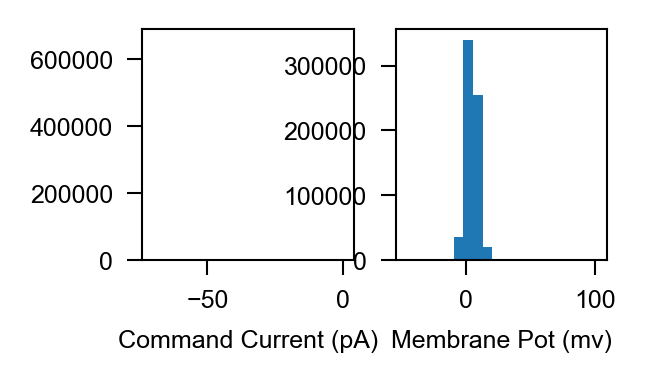

Analyzing I0 - 3min GapFree:  14%|███████▊                                               | 1/7 [00:00<00:03,  1.62it/s]

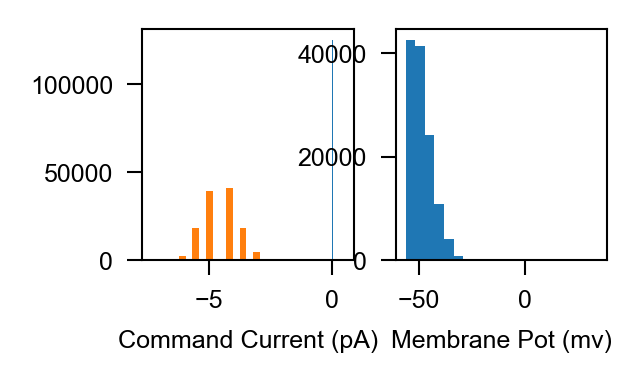

Analyzing I0 - 3min GapFree:  29%|███████████████▋                                       | 2/7 [00:01<00:02,  1.73it/s]

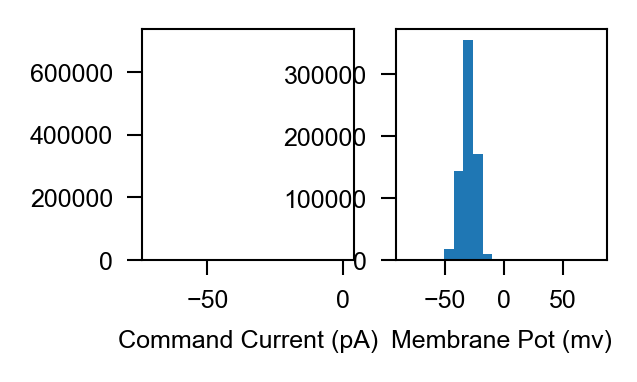

Analyzing I0 - 3min GapFree:  43%|███████████████████████▌                               | 3/7 [00:01<00:02,  1.66it/s]

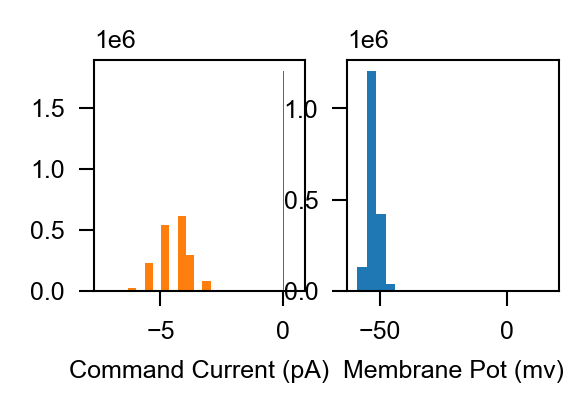

Analyzing I0 - 3min GapFree:  57%|███████████████████████████████▍                       | 4/7 [00:02<00:01,  1.55it/s]

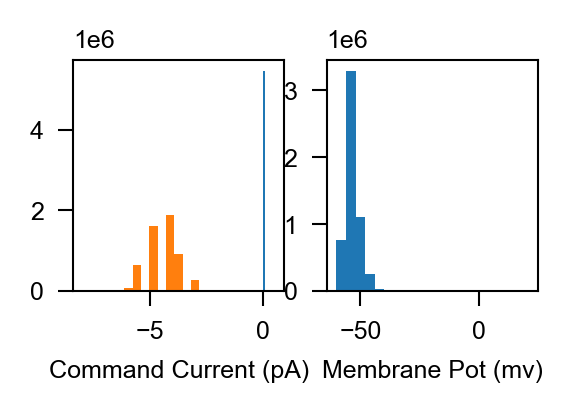

Analyzing I0 - 3min GapFree:  71%|███████████████████████████████████████▎               | 5/7 [00:03<00:01,  1.23it/s]

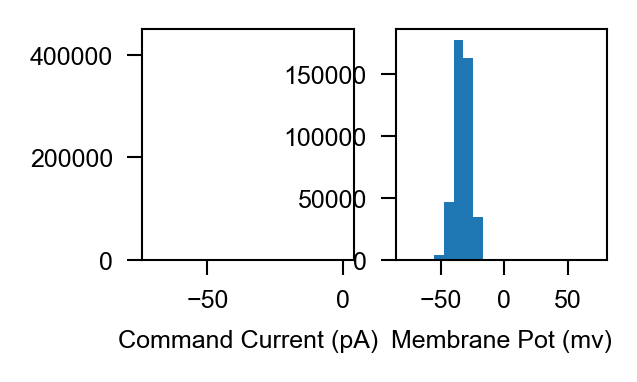

Analyzing I0 - 3min GapFree:  86%|███████████████████████████████████████████████▏       | 6/7 [00:04<00:00,  1.36it/s]

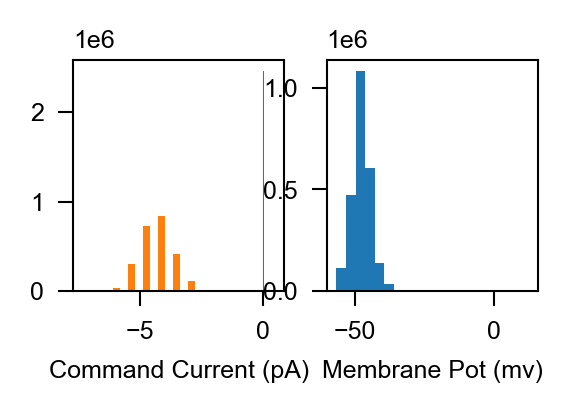

Analyzing VC - MemTest-10ms-160ms:   0%|                                                         | 0/2 [00:00<?, ?it/s]

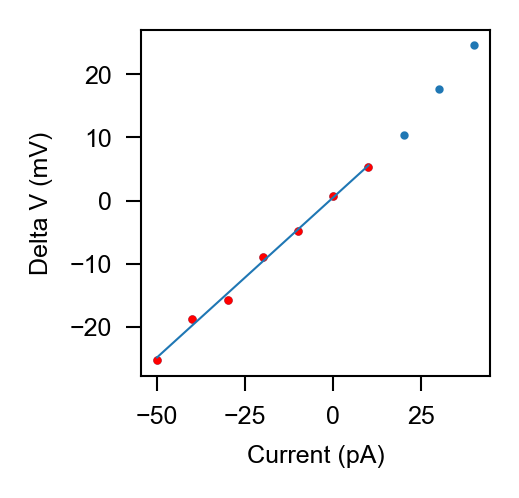

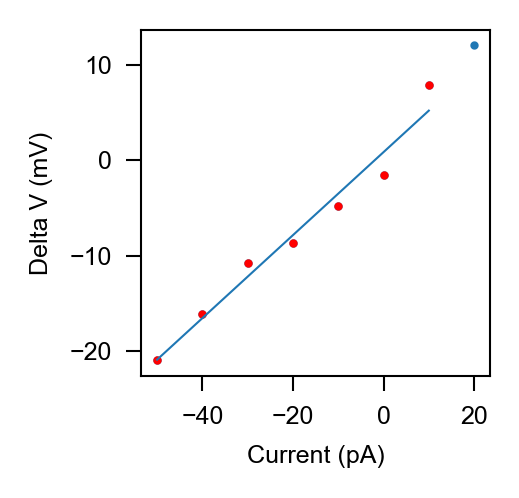

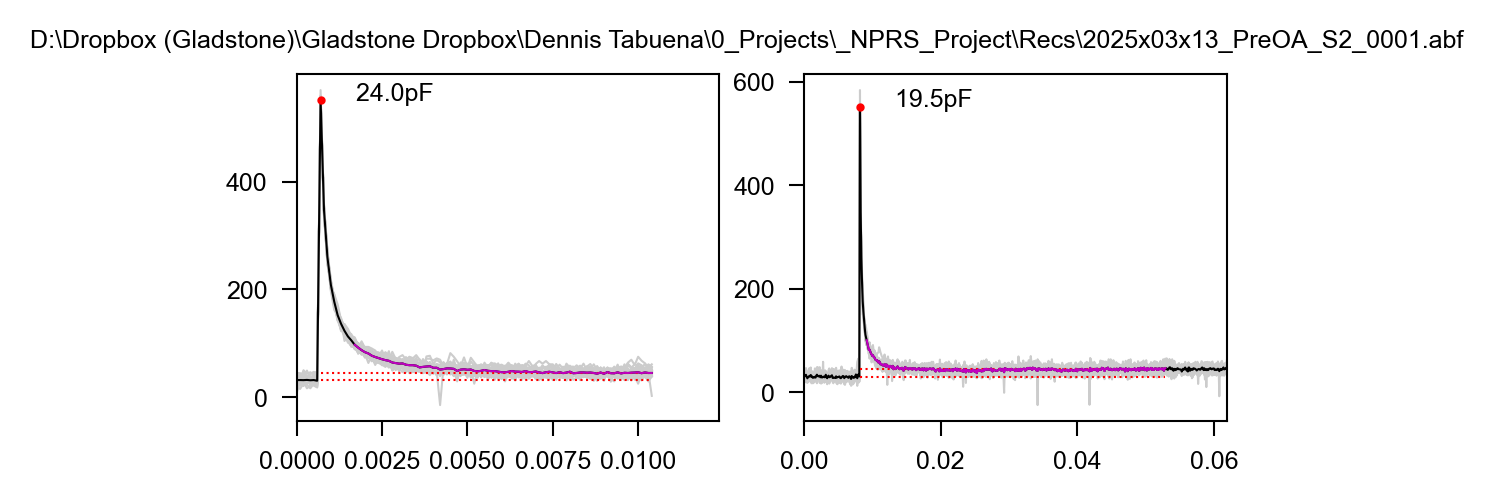

Analyzing VC - MemTest-10ms-160ms:  50%|████████████████████████▌                        | 1/2 [00:00<00:00,  1.04it/s]

<Figure size 450x450 with 0 Axes>

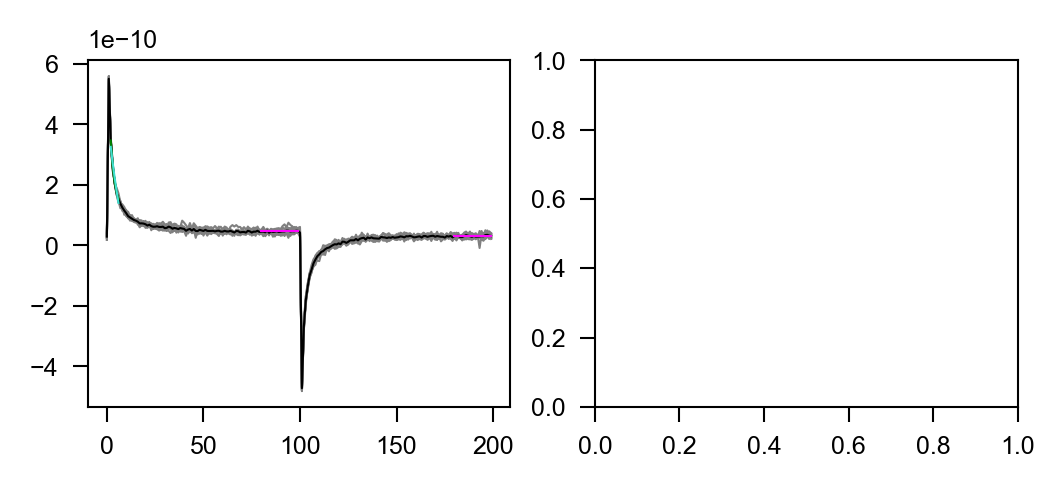

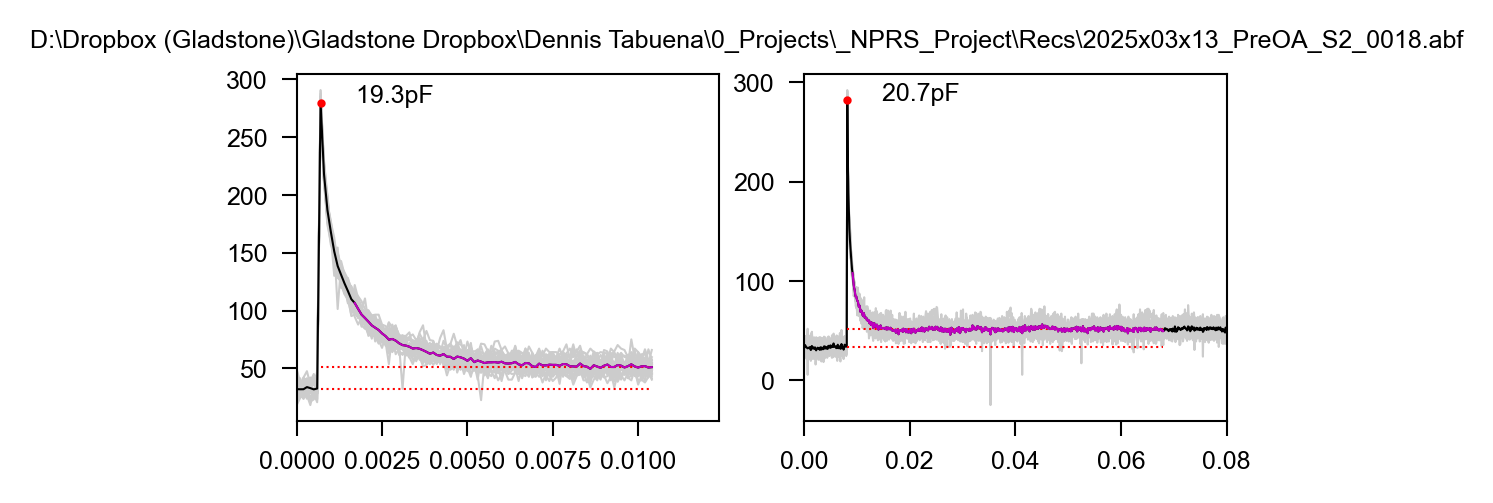

Analyzing VC - Multi IV - 150ms:   0%|                                                           | 0/3 [00:00<?, ?it/s]

<Figure size 450x450 with 0 Axes>

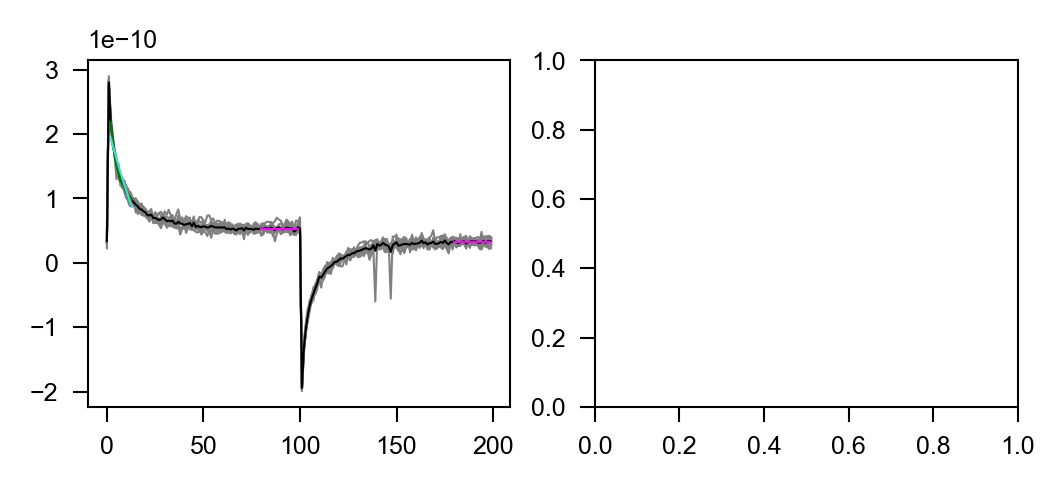

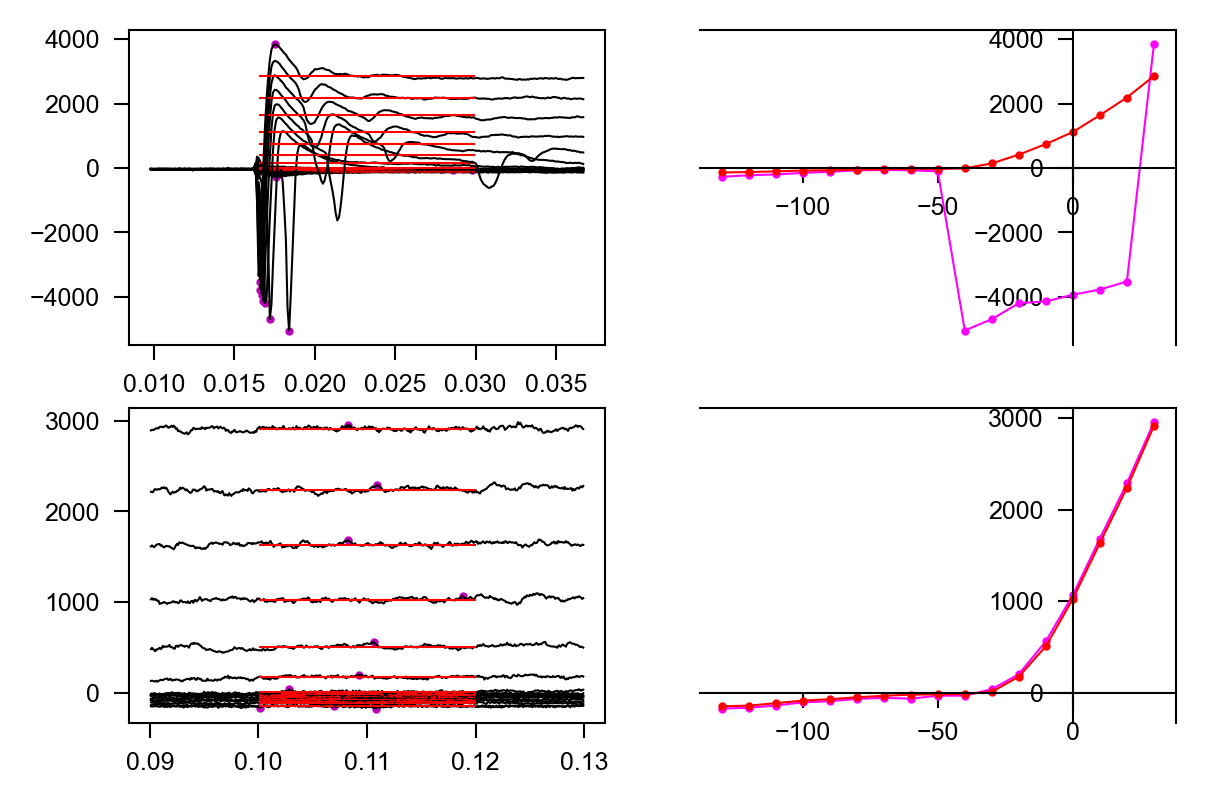

Analyzing VC - Multi IV - 150ms:  33%|█████████████████                                  | 1/3 [00:02<00:04,  2.33s/it]

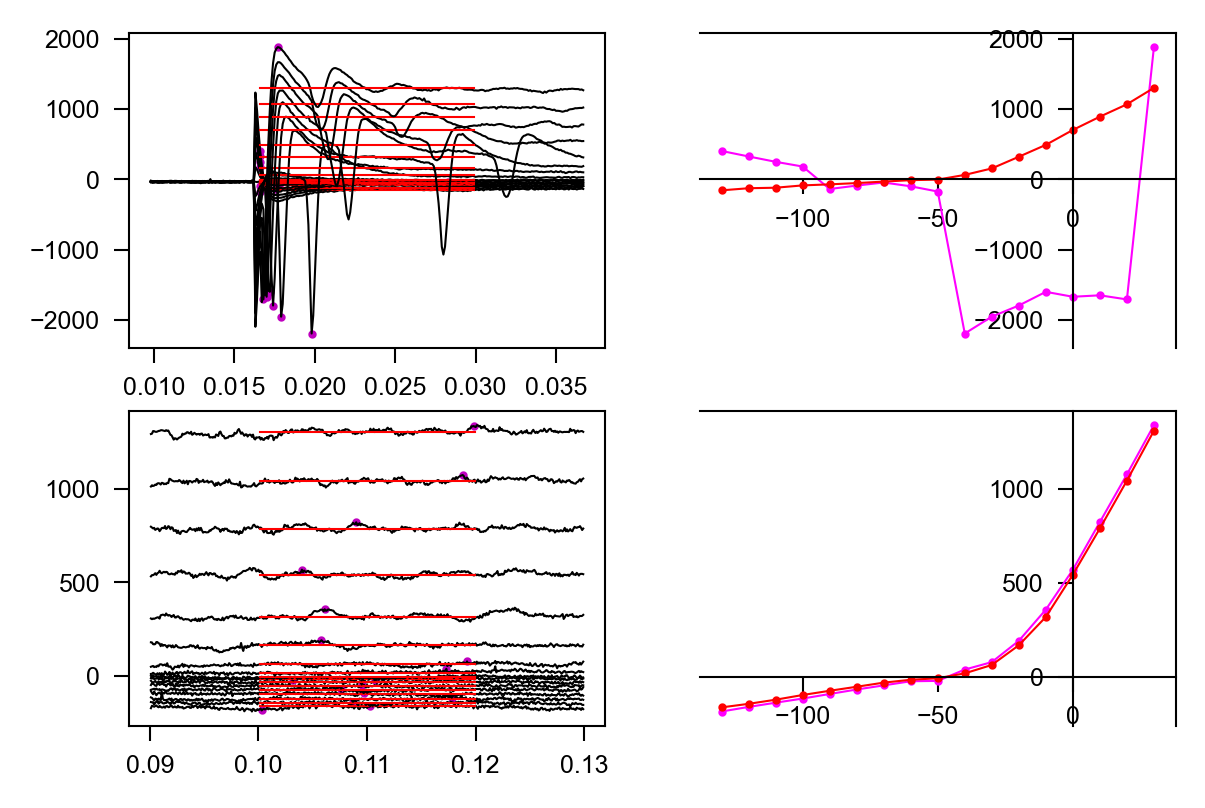

Analyzing VC - Multi IV - 150ms:  67%|██████████████████████████████████                 | 2/3 [00:04<00:02,  2.13s/it]

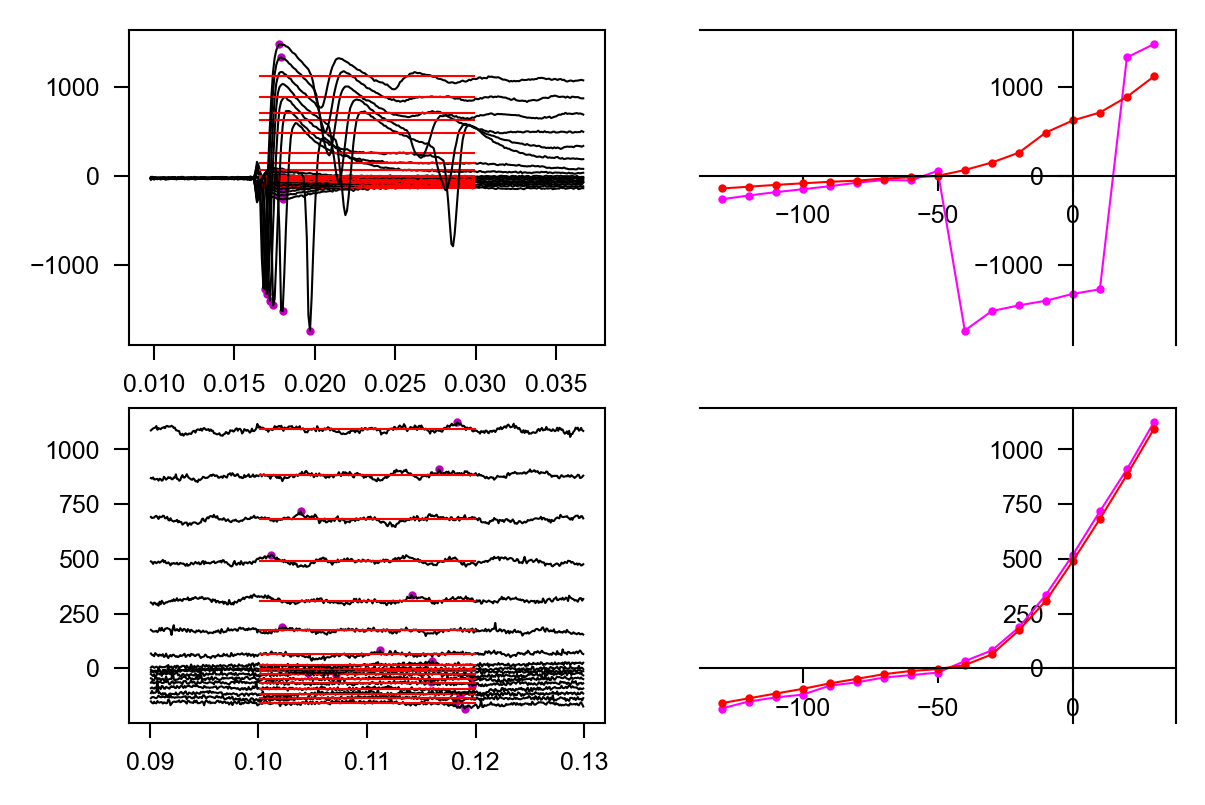

Analyzing VC - Multi IV - 150ms: 100%|███████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.10s/it]

D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S1_0000.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S1_0001.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S1_0002.abf No analyzer configured
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S2_0005.abf name 'spikes_per_stim' is not defined
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S2_0013.abf name 'spikes_per_stim' is not defined
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S2_0007.abf name 'find_spike_in_trace' is not defined
D:\Dropbox (Gladstone)\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13_PreOA_S2_0015.abf name 'fi

In [23]:
from tqdm import tqdm
def execute_analysis_suite(protocol_groups, protocol_analyzers):
    problem_records = {}

    for protocol, protocol_df in protocol_groups.items():
        if protocol not in protocol_analyzers:
            for filename in protocol_df.index:
                problem_records[filename] = 'No analyzer configured'
            continue

        analyzer_func, analyzer_args = protocol_analyzers[protocol]

        for filename in tqdm(protocol_df.index, desc=f'Analyzing {protocol}'):
            abf = pyabf.ABF(filename)
            try:
                results = analyzer_func(abf, *analyzer_args)
                for k, v in results.items():
                    if k not in protocol_df.columns:
                        protocol_df[k] = pd.Series(dtype='object')
                    protocol_df.at[filename, k] = v
            except Exception as e:
                problem_records[filename] = str(e)

    return protocol_groups, problem_records
protocol_groups_data, problem_records = execute_analysis_suite(protocol_groups, protocol_analyzers)

for k,v in problem_records.items():
    print(k,v)